In [1]:
import pandas as pd
import numpy as np

mobile_review = pd.read_csv('Amazon_Unlocked_Mobile.csv')

mobile_review = mobile_review.sample(frac = 0.1 , random_state = 10)

mobile_review.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


In [2]:
#Drop missing values
mobile_review.dropna(inplace = True)



In [3]:
#Remove Neutral Rating

mobile_review = mobile_review[mobile_review['Rating'] != 3]

#Assuming Ratings 4 and 5 as positive rating

#Assuming Ratings less than 3 as negative rating

mobile_review['Rating Distribution'] = np.where(mobile_review['Rating']>3 , 1 , 0)

#mobile_review['Negatively Rated'] = np.where(mobile_review['Rating']<3 , 'Negative' )

mobile_review.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Rating Distribution
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1
277158,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1


In [4]:
mobile_review['Rating Distribution'].mean()

0.7471776686078667

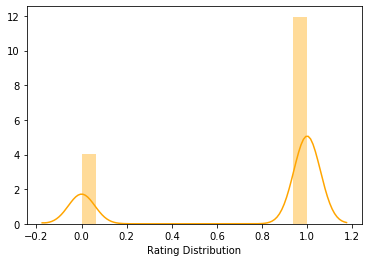

In [5]:
import seaborn as sns

x= mobile_review['Rating Distribution']

ax = sns.distplot(x, color = 'orange' )

In [6]:
from sklearn.model_selection import train_test_split
#Split the Data into training and test set

X_train,X_test,y_train,y_test = train_test_split(mobile_review['Reviews'],
                                                 mobile_review['Rating Distribution'], random_state = 0)

# Count Vectorizer
### Count Vectorizer converts a collection of text documents into a matix of token counts, also called as bag of words approach
#### The bag-of-words approach is simple and commonly used way to represent text for use in machine learning, which ignores structure and only counts how often each word occurs.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
#Fit the countvectorizer into the training data
vect = CountVectorizer().fit(X_train)


In [8]:
vect.get_feature_names()[:2000]

['00',
 '000',
 '0000',
 '000000',
 '000mah',
 '002',
 '00am',
 '00k',
 '00pm',
 '00us',
 '01',
 '011',
 '013287002557427',
 '016',
 '02',
 '03',
 '032g',
 '04',
 '0412',
 '044',
 '05',
 '06',
 '0630',
 '07',
 '0700',
 '07gb',
 '08',
 '09',
 '09on',
 '0a',
 '0c',
 '0ghz',
 '0hd',
 '0i',
 '0l',
 '0lte',
 '0mp',
 '0mpthis',
 '0social',
 '0v',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1000000',
 '10000mah',
 '1001multi',
 '10050',
 '100gb',
 '100mb',
 '100s',
 '100x',
 '101',
 '1016',
 '102',
 '1020',
 '104',
 '1053',
 '1060',
 '1067',
 '106miles',
 '107',
 '108',
 '1080',
 '1080p',
 '109',
 '10d',
 '10days',
 '10f',
 '10gb',
 '10mb',
 '10mbs',
 '10memory',
 '10min',
 '10music',
 '10navigation',
 '10other',
 '10ovi',
 '10phone',
 '10pm',
 '10th',
 '10touch',
 '10uscw52ena001558',
 '10w',
 '10x',
 '10year',
 '11',
 '110',
 '1100',
 '11059mem',
 '1109miami',
 '110db',
 '110v',
 '111',
 '1116',
 '112',
 '114',
 '115',
 '116',
 '119',
 '11gb',
 '11pm',
 '11th',
 '11yr',
 '12',
 '120',
 '

In [9]:
len(vect.get_feature_names())

19601

In [10]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<23052x19601 sparse matrix of type '<class 'numpy.int64'>'
	with 613289 stored elements in Compressed Sparse Row format>

In [11]:
print(X_train_vectorized)

  (0, 1063)	1
  (0, 2262)	1
  (0, 6631)	1
  (0, 9555)	1
  (0, 9582)	1
  (1, 296)	1
  (1, 298)	1
  (1, 1457)	1
  (1, 1574)	1
  (1, 1698)	4
  (1, 2022)	2
  (1, 2320)	1
  (1, 2572)	1
  (1, 2654)	1
  (1, 2906)	2
  (1, 2951)	1
  (1, 3019)	1
  (1, 3203)	2
  (1, 3306)	1
  (1, 3308)	1
  (1, 4813)	1
  (1, 5416)	1
  (1, 5725)	1
  (1, 5779)	1
  (1, 5914)	1
  :	:
  (23050, 19424)	1
  (23050, 19488)	18
  (23050, 19496)	4
  (23050, 19502)	2
  (23050, 19529)	2
  (23050, 19532)	1
  (23051, 446)	1
  (23051, 1698)	1
  (23051, 6351)	1
  (23051, 7058)	1
  (23051, 7576)	1
  (23051, 9582)	3
  (23051, 10312)	1
  (23051, 11950)	1
  (23051, 12360)	1
  (23051, 12800)	2
  (23051, 14676)	1
  (23051, 15693)	1
  (23051, 17333)	1
  (23051, 17343)	2
  (23051, 18334)	1
  (23051, 18884)	1
  (23051, 19057)	1
  (23051, 19205)	1
  (23051, 19285)	1


In [12]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

C:\Users\lenovo\Anaconda3\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8971767259522229


In [14]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['worst' 'terrible' 'slow' 'junk' 'sucks' 'poor' 'waste' 'disappointed'
 'broke' 'horrible']

Largest Coefs: 
['excelent' 'excellent' 'excelente' 'perfectly' 'love' 'perfect' 'exactly'
 'great' 'best' 'awesome']


# Tfidf(Term Frequency -inverse document frequency)
### Tfidf  is a numerical statistics that is intended to reflect how important a word is to a document in a collection or corpus

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

5442

In [16]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.889951006492175


In [17]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['61' 'printer' 'approach' 'adjustment' 'consequences' 'length' 'emailing'
 'degrees' 'handsfree' 'chipset']

Largest tfidf: 
['unlocked' 'handy' 'useless' 'cheat' 'up' 'original' 'exelent' 'exelente'
 'exellent' 'satisfied']


In [18]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'slow' 'disappointed' 'worst' 'terrible' 'never' 'return' 'doesn'
 'horrible' 'waste']

Largest Coefs: 
['great' 'love' 'excellent' 'good' 'best' 'perfect' 'price' 'awesome'
 'far' 'perfectly']


In [19]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


In [23]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['an experience i want to forget','GREAT PHONE WORK ACCORDING MY EXPECTATIONS.'])))

[1 1]
